In [1]:
!pip install dmba
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from dmba import classificationSummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 4.5 MB/s 
no display found. Using non-interactive Agg backend


In [2]:
df = pd.read_csv('BathSoapHousehold.csv')

In [3]:
df.head()

,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
0,1010010,4,3,10,1,4,4,2,4,1,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.028037,0.0,0.130841,0.339564
1,1010020,3,2,10,2,2,4,4,2,1,...,0.347048,0.026834,0.016100,0.014311,0.0,0.059034,0.000000,0.0,0.080501,0.000000
2,1014020,2,3,10,2,4,5,6,4,1,...,0.121212,0.033550,0.010823,0.008658,0.0,0.000000,0.016234,0.0,0.561688,0.003247
3,1014030,4,0,0,0,4,0,0,5,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.600000,0.000000
4,1014190,4,1,10,2,3,4,4,3,1,...,0.000000,0.000000,0.048193,0.000000,0.0,0.000000,0.000000,0.0,0.144578,0.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Member id              600 non-null    int64  
 1   SEC                    600 non-null    int64  
 2   FEH                    600 non-null    int64  
 3   MT                     600 non-null    int64  
 4   SEX                    600 non-null    int64  
 5   AGE                    600 non-null    int64  
 6   EDU                    600 non-null    int64  
 7   HS                     600 non-null    int64  
 8   CHILD                  600 non-null    int64  
 9   CS                     600 non-null    int64  
 10  Affluence Index        600 non-null    int64  
 11  No. of Brands          600 non-null    int64  
 12  Brand Runs             600 non-null    int64  
 13  Total Volume           600 non-null    int64  
 14  No. of  Trans          600 non-null    int64  
 15  Value 

In [5]:
df['Member id'] = df['Member id'].apply(str)

In [6]:
df.set_index('Member id',inplace=True)

In [7]:
df_norm = df

In [8]:
df_norm[['SEC','AGE','EDU','HS','Affluence Index','No. of Brands','Brand Runs','Total Volume','No. of  Trans','Value','Avg. Price ','Trans / Brand Runs','Vol/Tran']] = df_norm[['SEC','AGE','EDU','HS','Affluence Index','No. of Brands','Brand Runs','Total Volume','No. of  Trans','Value','Avg. Price ','Trans / Brand Runs','Vol/Tran']].apply(preprocessing.scale, axis=0)

In [9]:
df_norm.head()

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
Member id,,,,,,,,,,,,,,,,,,,,,
1010010,1.341641,3,10,1,0.909686,-0.019803,-0.953656,4,1,-1.317478,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.028037,0.0,0.130841,0.339564
1010020,0.447214,2,10,2,-1.403075,-0.019803,-0.083400,2,1,0.173676,...,0.347048,0.026834,0.016100,0.014311,0.0,0.059034,0.000000,0.0,0.080501,0.000000
1014020,-0.447214,3,10,2,0.909686,0.437198,0.786857,4,1,0.524535,...,0.121212,0.033550,0.010823,0.008658,0.0,0.000000,0.016234,0.0,0.561688,0.003247
1014030,1.341641,0,0,0,0.909686,-1.847808,-1.823913,5,0,-1.492908,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.600000,0.000000
1014190,1.341641,1,10,2,-0.246695,-0.019803,-0.083400,3,1,-0.615759,...,0.000000,0.000000,0.048193,0.000000,0.0,0.000000,0.000000,0.0,0.144578,0.000000


In [10]:
behavior_df = df_norm[['No. of Brands','Brand Runs','Total Volume','No. of  Trans','Value','Trans / Brand Runs','Vol/Tran']]

In [11]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(behavior_df)

In [12]:
memb = pd.Series(kmeans.labels_, index=behavior_df.index)
for key, item in memb.groupby(memb):
  print(key,': ',', '.join(item.index))

0 :  1010020, 1014020, 1017020, 1017490, 1020070, 1024120, 1024220, 1027390, 1028050, 1035150, 1037630, 1037850, 1037890, 1038080, 1040080, 1040150, 1040370, 1047350, 1047750, 1050210, 1054310, 1055060, 1055160, 1055330, 1057550, 1057800, 1057930, 1058010, 1060130, 1060230, 1060260, 1060370, 1060420, 1060590, 1060640, 1061180, 1061310, 1061700, 1061730, 1065040, 1065100, 1065600, 1065650, 1065660, 1070300, 1070330, 1070600, 1070670, 1070790, 1071090, 1071780, 1071800, 1071840, 1075130, 1075220, 1075350, 1075520, 1075610, 1075630, 1075690, 1075730, 1080220, 1080330, 1080590, 1080690, 1080750, 1081530, 1081850, 1082210, 1085230, 1085290, 1085480, 1095130, 1095150, 1097180, 1097450, 1100100, 1100120, 1100290, 1100460, 1100490, 1100510, 1100910, 1101080, 1104070, 1104630, 1105040, 1105100, 1105130, 1105150, 1105250, 1105370, 1105400, 1106020, 1106040, 1106090, 1106180, 1106290, 1106550, 1106730, 1110370, 1110380, 1110540, 1110680, 1110970, 1111010, 1111280, 1111410, 1111750, 1115200, 11153

In [13]:
centroids = {}
for key, item in behavior_df.groupby(memb):
    centroids[key] = item.mean()
    print('Cluster {}: size {}'.format(key, len(item)))
pd.DataFrame(centroids).transpose().round(2)

Cluster 0: size 220
Cluster 1: size 314
Cluster 2: size 66


,No. of Brands,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran
0,0.86,0.92,0.14,0.79,0.28,-0.29,-0.44
1,-0.55,-0.59,-0.51,-0.59,-0.52,0.04,-0.08
2,-0.28,-0.28,1.94,0.18,1.55,0.79,1.85


{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',

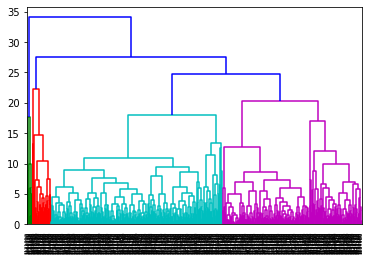

In [14]:
Z = linkage(behavior_df, method='complete', metric='cityblock')
dendrogram(Z, labels=behavior_df.index)

In [15]:
memb = fcluster(linkage(behavior_df, method='complete', metric='cityblock'), 6, criterion='maxclust')
centroids = {}
for key, item in behavior_df.groupby(memb):
    centroids[key] = item.mean()
    print('Cluster {}: size {}'.format(key, len(item)))
pd.DataFrame(centroids).transpose().round(2)

Cluster 1: size 10
Cluster 2: size 2
Cluster 3: size 31
Cluster 4: size 307
Cluster 5: size 156
Cluster 6: size 94


,No. of Brands,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran
1,2.07,3.92,0.66,3.15,1.05,-0.43,-0.86
2,-1.67,-0.89,1.18,-1.30,0.35,-0.56,7.03
3,-0.10,0.03,2.17,0.00,2.01,-0.20,2.18
4,0.53,0.51,0.10,0.51,0.20,-0.22,-0.35
5,-0.67,-0.71,-0.90,-0.99,-0.88,-0.22,-0.20
6,-0.78,-0.91,0.35,-0.31,0.03,1.22,0.70


{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',

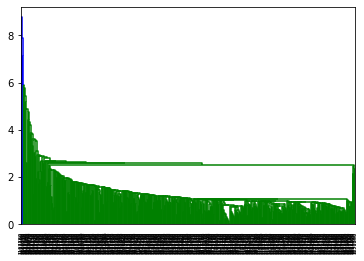

In [16]:
Z = linkage(behavior_df, method='single', metric='cityblock')
dendrogram(Z, labels=behavior_df.index)

In [17]:
memb = fcluster(linkage(behavior_df, method='single', metric='cityblock'), 10, criterion='maxclust')
centroids = {}
for key, item in behavior_df.groupby(memb):
    centroids[key] = item.mean()
    print('Cluster {}: size {}'.format(key, len(item)))
pd.DataFrame(centroids).transpose().round(2)

Cluster 1: size 591
Cluster 2: size 1
Cluster 3: size 1
Cluster 4: size 1
Cluster 5: size 1
Cluster 6: size 1
Cluster 7: size 1
Cluster 8: size 1
Cluster 9: size 1
Cluster 10: size 1


,No. of Brands,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran
1,-0.02,-0.02,-0.04,-0.05,-0.04,-0.02,-0.01
2,0.23,0.89,2.47,1.83,5.70,-0.04,0.32
3,0.86,-0.26,1.65,3.44,1.66,1.68,-0.58
4,0.86,5.61,-0.04,5.27,0.83,-0.37,-1.29
5,0.86,0.31,2.85,3.72,4.95,0.93,-0.24
6,3.40,4.45,0.53,6.14,0.42,-0.15,-1.20
7,2.13,0.51,4.44,1.43,3.49,0.02,1.66
8,-1.04,-1.23,1.87,2.17,0.68,7.83,-0.13
9,-1.67,-0.36,3.67,-0.87,2.01,-0.49,8.49
10,3.40,3.97,4.91,3.67,5.38,-0.36,0.45


In [18]:
basis_df = df_norm[['Avg. Price ','PropCat 5','PropCat 6','PropCat 7','PropCat 8','PropCat 9','PropCat 10','PropCat 11','PropCat 12','PropCat 13','PropCat 14','PropCat 15']]

In [19]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(basis_df)

In [20]:
memb = pd.Series(kmeans.labels_, index=basis_df.index)
for key, item in memb.groupby(memb):
  print(key,': ',', '.join(item.index))

0 :  1010010, 1010020, 1017020, 1017110, 1017360, 1017460, 1017490, 1020070, 1024100, 1024120, 1024220, 1024400, 1024630, 1027210, 1027390, 1027480, 1027540, 1027750, 1028050, 1034220, 1035020, 1035150, 1037120, 1037220, 1037290, 1038000, 1038080, 1040150, 1040250, 1040340, 1044140, 1045030, 1045120, 1047220, 1047650, 1047750, 1047760, 1047870, 1055060, 1055160, 1055330, 1057280, 1057500, 1057550, 1057800, 1058000, 1058010, 1058370, 1060050, 1060150, 1060260, 1060370, 1060420, 1060590, 1060640, 1060650, 1060760, 1060920, 1060980, 1061080, 1061130, 1061180, 1061310, 1061400, 1061700, 1061730, 1062120, 1065100, 1065160, 1065340, 1065370, 1065600, 1065650, 1065780, 1070270, 1070300, 1070310, 1070330, 1070420, 1070500, 1070600, 1070660, 1070790, 1070880, 1071010, 1071090, 1071120, 1071500, 1071560, 1071640, 1071780, 1071800, 1071840, 1071910, 1075200, 1075220, 1075400, 1075420, 1075520, 1075610, 1075630, 1075690, 1077110, 1077200, 1077570, 1080080, 1080180, 1080220, 1080230, 1080250, 10803

In [21]:
centroids = {}
for key, item in basis_df.groupby(memb):
    centroids[key] = item.mean()
    print('Cluster {}: size {}'.format(key, len(item)))
pd.DataFrame(centroids).transpose().round(2)

Cluster 0: size 370
Cluster 1: size 127
Cluster 2: size 103


,Avg. Price,PropCat 5,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
0,-0.05,0.53,0.09,0.13,0.08,0.04,0.01,0.04,0.00,0.01,0.04,0.03
1,-1.19,0.33,0.07,0.02,0.01,0.02,0.00,0.01,0.00,0.00,0.52,0.02
2,1.64,0.36,0.13,0.06,0.17,0.03,0.08,0.01,0.02,0.11,0.01,0.02


{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',

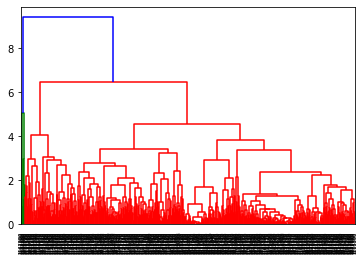

In [22]:
Z = linkage(basis_df, method='complete', metric='cityblock')
dendrogram(Z, labels=basis_df.index)

In [23]:
memb = fcluster(linkage(basis_df, method='complete', metric='cityblock'), 6, criterion='maxclust')
centroids = {}
for key, item in basis_df.groupby(memb):
    centroids[key] = item.mean()
    print('Cluster {}: size {}'.format(key, len(item)))
pd.DataFrame(centroids).transpose().round(2)

Cluster 1: size 4
Cluster 2: size 4
Cluster 3: size 29
Cluster 4: size 64
Cluster 5: size 194
Cluster 6: size 305


,Avg. Price,PropCat 5,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
1,3.18,0.03,0.01,0.00,0.00,0.00,0.00,0.04,0.00,0.91,0.01,0.00
2,4.87,0.42,0.06,0.02,0.01,0.00,0.44,0.01,0.00,0.00,0.00,0.04
3,2.10,0.43,0.06,0.04,0.11,0.02,0.14,0.01,0.02,0.16,0.01,0.01
4,1.15,0.32,0.19,0.08,0.24,0.03,0.04,0.01,0.02,0.05,0.01,0.02
5,0.19,0.36,0.14,0.21,0.10,0.03,0.02,0.06,0.01,0.01,0.03,0.03
6,-0.67,0.56,0.05,0.04,0.03,0.03,0.00,0.01,0.00,0.00,0.25,0.03


{'color_list': ['g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',

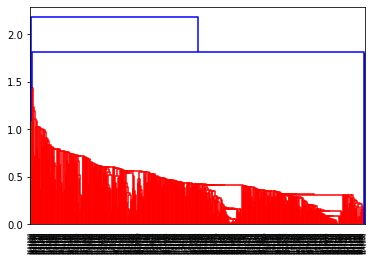

In [24]:
Z = linkage(basis_df, method='single', metric='cityblock')
dendrogram(Z, labels=basis_df.index)

In [25]:
memb = fcluster(linkage(basis_df, method='single', metric='cityblock'), 10, criterion='maxclust')
centroids = {}
for key, item in basis_df.groupby(memb):
    centroids[key] = item.mean()
    print('Cluster {}: size {}'.format(key, len(item)))
pd.DataFrame(centroids).transpose().round(2)

Cluster 1: size 2
Cluster 2: size 3
Cluster 3: size 588
Cluster 4: size 1
Cluster 5: size 1
Cluster 6: size 1
Cluster 7: size 1
Cluster 8: size 1
Cluster 9: size 1
Cluster 10: size 1


,Avg. Price,PropCat 5,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
1,5.43,0.11,0.11,0.00,0.02,0.00,0.73,0.03,0.00,0.00,0.00,0.00
2,-1.19,0.07,0.02,0.02,0.01,0.00,0.00,0.00,0.00,0.01,0.13,0.74
3,-0.04,0.46,0.09,0.10,0.08,0.03,0.01,0.03,0.01,0.02,0.14,0.02
4,1.76,0.00,0.00,0.40,0.43,0.00,0.18,0.00,0.00,0.00,0.00,0.00
5,1.54,0.01,0.01,0.60,0.00,0.00,0.00,0.00,0.01,0.37,0.00,0.00
6,1.73,0.00,0.00,0.22,0.00,0.00,0.33,0.00,0.33,0.11,0.00,0.00
7,1.83,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
8,0.94,0.12,0.00,0.00,0.00,0.00,0.52,0.00,0.04,0.00,0.31,0.00
9,4.72,0.94,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10,3.90,0.51,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.17


In [26]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_norm)

In [27]:
memb = pd.Series(kmeans.labels_, index=df_norm.index)
for key, item in memb.groupby(memb):
  print(key,': ',', '.join(item.index))

0 :  1010010, 1010020, 1014020, 1014190, 1017020, 1017110, 1017160, 1017360, 1017490, 1020070, 1020210, 1024050, 1024100, 1024120, 1024220, 1024400, 1024630, 1025210, 1027040, 1027390, 1027540, 1027580, 1027720, 1027750, 1028020, 1028050, 1028110, 1028230, 1030040, 1030280, 1030300, 1034130, 1034220, 1035020, 1037050, 1037220, 1037250, 1037290, 1037420, 1037850, 1037890, 1037940, 1038000, 1038080, 1038110, 1040080, 1040150, 1040190, 1040250, 1040340, 1044010, 1044370, 1045030, 1045060, 1045120, 1047210, 1047220, 1047350, 1047420, 1047610, 1047750, 1047760, 1047870, 1050050, 1050210, 1054110, 1054270, 1054310, 1055060, 1055160, 1055260, 1055330, 1057150, 1057280, 1057410, 1057510, 1057550, 1057580, 1057800, 1058000, 1058010, 1058190, 1058350, 1058370, 1060050, 1060150, 1060230, 1060260, 1060330, 1060370, 1060420, 1060590, 1060640, 1060650, 1060720, 1060760, 1060810, 1060920, 1061080, 1061130, 1061180, 1061310, 1061400, 1061660, 1061700, 1061730, 1061820, 1061830, 1061940, 1062120, 10622

In [28]:
centroids = {}
for key, item in df_norm.groupby(memb):
    centroids[key] = item.mean()
    print('Cluster {}: size {}'.format(key, len(item)))
pd.DataFrame(centroids).transpose().round(2)

Cluster 0: size 404
Cluster 1: size 68
Cluster 2: size 128


,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
0,0.18,2.56,10.77,1.97,0.08,0.15,0.22,2.99,1.05,0.11,...,0.10,0.10,0.08,0.03,0.02,0.03,0.01,0.02,0.14,0.02
1,-0.26,0.00,0.00,0.00,-0.59,-1.85,-1.82,5.00,0.00,-1.49,...,0.07,0.08,0.10,0.02,0.03,0.01,0.01,0.06,0.20,0.01
2,-0.44,1.52,4.34,1.95,0.06,0.50,0.26,3.08,1.04,0.45,...,0.08,0.09,0.09,0.03,0.02,0.03,0.00,0.03,0.09,0.04


{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',

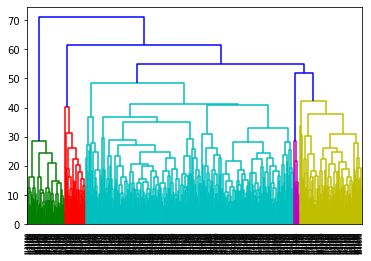

In [29]:
Z = linkage(df_norm, method='complete', metric='cityblock')
dendrogram(Z, labels=df_norm.index)

In [30]:
memb = fcluster(linkage(df_norm, method='complete', metric='cityblock'), 6, criterion='maxclust')
centroids = {}
for key, item in df_norm.groupby(memb):
    centroids[key] = item.mean()
    print('Cluster {}: size {}'.format(key, len(item)))
pd.DataFrame(centroids).transpose().round(2)

Cluster 1: size 68
Cluster 2: size 38
Cluster 3: size 29
Cluster 4: size 344
Cluster 5: size 10
Cluster 6: size 111


,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
1,-0.26,0.00,0.00,0.00,-0.59,-1.85,-1.82,5.00,0.00,-1.49,...,0.07,0.08,0.10,0.02,0.03,0.01,0.01,0.06,0.20,0.01
2,-0.16,2.66,9.66,1.97,0.21,0.34,0.68,1.97,1.05,0.62,...,0.13,0.09,0.10,0.05,0.03,0.04,0.01,0.03,0.06,0.04
3,0.69,2.86,16.72,1.97,0.11,-0.29,0.83,2.72,1.00,-0.34,...,0.05,0.09,0.04,0.01,0.01,0.02,0.00,0.00,0.24,0.01
4,0.16,2.51,10.17,1.96,0.04,0.19,0.15,3.11,1.05,0.12,...,0.11,0.11,0.08,0.03,0.02,0.03,0.01,0.02,0.12,0.02
5,0.36,2.40,8.40,2.00,0.56,-0.71,0.00,3.80,1.40,-0.61,...,0.03,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.95,0.00
6,-0.48,1.41,4.25,1.95,0.08,0.56,0.21,3.05,1.04,0.48,...,0.07,0.09,0.09,0.03,0.02,0.03,0.00,0.02,0.07,0.04


{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',

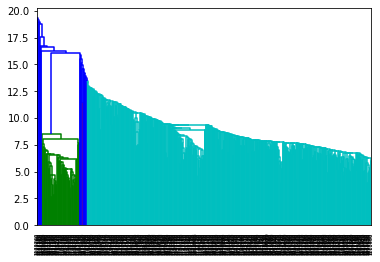

In [31]:
Z = linkage(df_norm, method='single', metric='cityblock')
dendrogram(Z, labels=df_norm.index)

In [32]:
memb = fcluster(linkage(df_norm, method='single', metric='cityblock'), 10, criterion='maxclust')
centroids = {}
for key, item in df_norm.groupby(memb):
    centroids[key] = item.mean()
    print('Cluster {}: size {}'.format(key, len(item)))
pd.DataFrame(centroids).transpose().round(2)

Cluster 1: size 591
Cluster 2: size 1
Cluster 3: size 1
Cluster 4: size 1
Cluster 5: size 1
Cluster 6: size 1
Cluster 7: size 1
Cluster 8: size 1
Cluster 9: size 1
Cluster 10: size 1


,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
1,0.01,2.06,8.16,1.73,0.01,-0.01,-0.03,3.25,0.93,-0.02,...,0.09,0.10,0.08,0.03,0.02,0.03,0.01,0.03,0.14,0.03
2,-1.34,2.00,17.00,2.00,0.91,1.35,-0.52,4.00,1.00,-1.41,...,0.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00
3,-1.34,1.00,4.00,2.00,-1.40,0.89,2.53,3.00,1.00,2.98,...,0.22,0.07,0.23,0.00,0.07,0.01,0.04,0.06,0.01,0.03
4,1.34,3.00,17.00,2.00,-2.56,-0.02,4.70,1.00,1.00,1.75,...,0.00,0.04,0.11,0.00,0.04,0.00,0.01,0.00,0.03,0.03
5,-0.45,1.00,13.00,2.00,-1.40,-0.02,-0.08,1.00,1.00,0.17,...,0.00,0.00,0.04,0.00,0.78,0.05,0.00,0.00,0.00,0.00
6,-1.34,1.00,4.00,2.00,-0.25,1.35,1.66,1.00,1.00,1.84,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06
7,-1.34,3.00,17.00,2.00,-0.25,2.27,-0.08,2.00,1.00,2.45,...,0.00,0.00,0.45,0.00,0.00,0.54,0.00,0.00,0.00,0.00
8,-1.34,1.00,4.00,2.00,0.91,1.35,0.79,4.00,1.00,0.70,...,0.25,0.00,0.00,0.09,0.00,0.00,0.00,0.00,0.66,0.00
9,1.34,1.00,4.00,2.00,-2.56,-0.48,4.70,1.00,2.00,-0.18,...,0.01,0.02,0.01,0.00,0.00,0.01,0.00,0.00,0.56,0.07
10,-1.34,1.00,4.00,2.00,0.91,-0.02,2.09,1.00,1.00,1.66,...,0.07,0.12,0.10,0.04,0.00,0.02,0.04,0.03,0.04,0.01


In [33]:
memb = pd.Series(kmeans.labels_, index=df_norm.index)
df_norm['Cluster'] = memb

In [34]:
df_norm.head()

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15,Cluster
Member id,,,,,,,,,,,,,,,,,,,,,
1010010,1.341641,3,10,1,0.909686,-0.019803,-0.953656,4,1,-1.317478,...,0.000000,0.000000,0.000000,0.0,0.000000,0.028037,0.0,0.130841,0.339564,0
1010020,0.447214,2,10,2,-1.403075,-0.019803,-0.083400,2,1,0.173676,...,0.026834,0.016100,0.014311,0.0,0.059034,0.000000,0.0,0.080501,0.000000,0
1014020,-0.447214,3,10,2,0.909686,0.437198,0.786857,4,1,0.524535,...,0.033550,0.010823,0.008658,0.0,0.000000,0.016234,0.0,0.561688,0.003247,0
1014030,1.341641,0,0,0,0.909686,-1.847808,-1.823913,5,0,-1.492908,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.600000,0.000000,1
1014190,1.341641,1,10,2,-0.246695,-0.019803,-0.083400,3,1,-0.615759,...,0.000000,0.048193,0.000000,0.0,0.000000,0.000000,0.0,0.144578,0.000000,0


In [37]:
predictors = ['SEC','FEH','MT','SEX','AGE','EDU','HS','CHILD','CS','Affluence Index']
outcome = 'Cluster'

In [38]:
X = df_norm[predictors]
y = df_norm[outcome]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.4, random_state = 1)

In [39]:
rf = RandomForestClassifier()

In [40]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
classificationSummary(y_valid, rf.predict(X_valid))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1   2
     0 163   0   0
     1   0  20   0
     2   0   0  57
